In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
import ptitprince as pt

def export_fig(axis,text, fname):
    if savefigs:
        axis.text()
        axis.savefig(fname, bbox_inches='tight')

In [3]:
## Set these for each figure

measureType = "GazeObject" # GazeObject, PupilDiameter
xAxis= "Cue" #Specify the name of your x axis, this should matach the df
#yAxis = "Pupil Diameter (mms)" #specify the name of your y axis, this should match the df
yAxis = "Fixations" #might have to rename the actual csv column name
zAxis = "Phase"
savefigs = True

In [4]:
path = "/Users/dhewitt/Data/pps/Exports/"
fileType = ".csv"
fileName = ("adjustedRQ1covdata_191124" + fileType)
print(path + measureType + "/" + fileName)

version  = "18-10-24"
figOutName = (measureType + "_Adjusted_" + version)

figs_dir = (path + 'figs/')

if savefigs:
    # Make the figures folder if it doesn't yet exist
    if not os.path.isdir(figs_dir):
        os.makedirs(figs_dir)

/Users/dhewitt/Data/pps/Exports/GazeObject/adjustedRQ1covdata_191124.csv


As first step, load the dataset

In [5]:
print(fileName)
df = pd.read_csv(path + measureType + "/" + fileName)
#df = df.groupby(['ID', 'Phase', 'Cue', 'Block']).mean().reset_index() #averaging because of repetitions which have the same predicted value
df = df.groupby(['ID', 'Phase', 'Cue', 'Condition']).mean().reset_index() #averaging because of repetitions which have the same predicted value
df

adjustedRQ1covdata_191124.csv


ID  Phase      Cue     Condition  Unnamed: 0      Side       Rep  \
0     2      1  Neutral  Conditioning    4.000000  0.000000  1.500000   
1     2      1  Neutral    Extinction    5.000000  0.000000  1.500000   
2     2      1     Pain  Conditioning    7.000000  1.500000  1.500000   
3     2      1     Pain    Extinction    8.000000  1.500000  1.500000   
4     3      1  Neutral  Conditioning   16.000000  0.000000  1.500000   
..   ..    ...      ...           ...         ...       ...       ...   
99   29      1     Pain    Extinction  294.666667  1.666667  1.333333   
100  30      1  Neutral  Conditioning  304.000000  0.000000  1.500000   
101  30      1  Neutral    Extinction  305.000000  0.000000  1.500000   
102  30      1     Pain  Conditioning  307.000000  1.500000  1.500000   
103  30      1     Pain    Extinction  308.000000  1.500000  1.500000   

      Measure   B1  congruency  ...  STAI_Trait_Score  Sex   Age  Handed  \
0    0.086521  2.0    0.000000  ...              37.0  2.0  32.0     1.0   
1    0.075681  2.0    0.000000  ...              37.0  2.0  32.0     1.0   
2    0.043958  2.0    1.500000  ...              37.0  2.0  32.0     1.0   
3    0.098576  2.0    1.500000  ...              37.0  2.0  32.0     1.0   
4    0.092667  1.0    0.000000  ...              35.0  1.0  26.0     1.0   
..        ...  ...         ...  ...               ...  ...   ...     ...   
99   0.396294  1.0    1.666667  ...              43.0  2.0  24.0     2.0   
100  0.092428  2.0    0.000000  ...              40.0  2.0  28.0     1.0   
101  0.105705  2.0    0.000000  ...              40.0  2.0  28.0     1.0   
102  0.271615  2.0    1.500000  ...              40.0  2.0  28.0     1.0   
103  0.304449  2.0    1.500000  ...              40.0  2.0  28.0     1.0   

     Elec_Lpain  Elec_Lunp  Elec_Rpain  Elec_Runp   z_score  Fixations  
0         4.500      5.665       3.665      4.665 -0.492745   0.006535  
1         4.500      5.665       3.665      4.665 -0.579058   0.004705  
2         4.500      5.665       3.665      4.665 -0.831638   0.126546  
3         4.500      5.665       3.665      4.665 -0.396756   0.105158  
4         2.835      2.670       2.665      2.835 -0.443811   0.061616  
..          ...        ...         ...        ...       ...        ...  
99        3.000      3.110       5.000      5.110  1.973746   0.294177  
100       5.500      5.830       6.830      7.000 -0.445708   0.147039  
101       5.500      5.830       6.830      7.000 -0.339998   0.145210  
102       5.500      5.830       6.830      7.000  0.981016   0.267050  
103       5.500      5.830       6.830      7.000  1.242455   0.245662  

[104 rows x 26 columns]

In [40]:
figSize = 3
timesSmaller = 8/figSize
#lW = 2.66/timesSmaller #indiivdual datapoint line width
lW = 2.4/timesSmaller #indiivdual datapoint line width
dotsize = 8/timesSmaller #indiv data point dot size
#eW = 3.57/timesSmaller #bar chart line width
eW = 1.6/timesSmaller #bar chart line width
spineW = 1/timesSmaller
sns.set(style="white",font_scale=2.8/timesSmaller)
boxWidth = 0.65/timesSmaller
violinWidth = 1.5/timesSmaller
ort="v"; 
sigma = .15

In [41]:
pal = "Set2"
#pal = sns.color_palette('vlag',4)
#pal = sns.color_palette(n_colors=8)
#pal = sns.color_palette('muted',8)
#pal = sns.color_palette('magma',4)
#pal = sns.color_palette('Spectral',4)

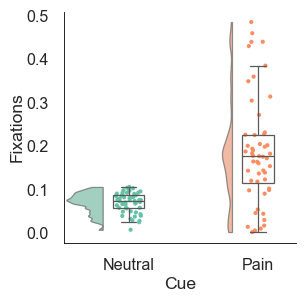

In [44]:
# Main effects of cue

#f, ax = plt.subplots(figsize=(7, 7))
#f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = xAxis, y = yAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = lW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig1sized.svg", format='svg', dpi=1200, bbox_inches='tight')

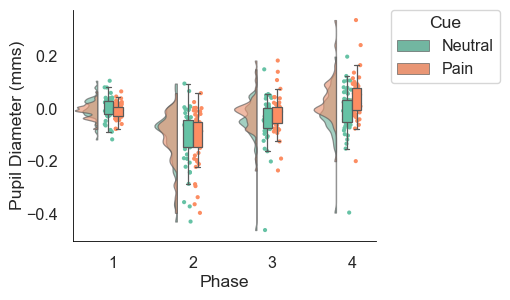

In [36]:
#Phase Interactions

#f, ax = plt.subplots(figsize=(7, 7))
f, ax = plt.subplots(figsize=(figSize*1.3, figSize)) # for a flatter, wider chart
#f, ax = plt.subplots(figsize=(figSize, figSize)) # for a squarer chart

ax=pt.RainCloud(x = zAxis, y = yAxis, hue = xAxis, data = df, palette = pal, bw = sigma,
                 width_viol = violinWidth, ax = ax, point_size = dotsize, linewidth = lW,
                orient = ort , box_showfliers = False,
                alpha = .65,  dodge = True, width_box = boxWidth,
               box_linewidth = lW, box_whiskerprops = dict(linewidth=lW))

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('Black')
ax.spines['bottom'].set_linewidth(eW)
ax.spines['left'].set_color('Black')
ax.spines['left'].set_linewidth(eW)
ax.tick_params(axis='both', which='both', pad=5) #change pad to make the axes labels further/closer to axis
ax.xaxis.labelpad = 3 # space between axis label and data name
ax.yaxis.labelpad = 1

#plt.title("Figure P15\n Adjusting Raincloud Alpha Level")
if savefigs:
    plt.savefig(figs_dir + figOutName +"_fig2sized.svg", format='svg', dpi=1200, bbox_inches='tight')